In [1]:
#Practice project done by Jennifer Belfield

#Source:  https://www.youtube.com/watch?v=ujId4ipkBio&t=604s 
#Newer source here helped me debug: https://www.youtube.com/watch?v=fQLa40L_BWA

#import libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
log=pd.read_csv('Login.csv')

In [2]:
#Twitter API credentials
consumerKey="MSWT4HVd9zGCYsQfAs1qUHKl8"
consumerSecret="OjIgvrCmc0T4Jx35piR0Fu4KRhEeRkyNqB2C7BJAEKIhUKPiJZ"
accessToken="771120507156660225-Jfg5Roz9Ktof8RjoOWyrXkd0mxSKlcd"
accessTokenSecret="kmQLXzuPJ2Wughl7Pyj9ATDzFt1fQ2D6PD39MlIKmzeLf"

In [3]:
authenticate = tweepy.OAuthHandler(consumerKey,consumerSecret)
authenticate.set_access_token(accessToken, accessTokenSecret)

api = tweepy.API(authenticate, wait_on_rate_limit=True)

In [4]:
posts=api.user_timeline(screen_name="elonmusk", count=500, lang="en", tweet_mode="extended")

#show the 5 recent tweets
print("Show the 5 recent tweets: \n")
i=1
for tweet in posts[0:500]:
  print(str(i) + ')' + tweet.full_text + '\n')
  i+=1

Show the 5 recent tweets: 

1)@lionxmah @folha ?

2)@AOC You’re welcome

3)@WholeMarsBlog Record numbers of users are logging in to see if Twitter is dead, ironically making it more alive than ever!

4)@piersmorgan Seriously

5)https://t.co/JU073T756X

6)https://t.co/rbwbsLA1ZG

7)🏴‍☠️

8)@ashleevance 🤣

9)Let that sink in …

10)And … we just hit another all-time high in Twitter usage lol

11)@stoolpresidente The best people are staying, so I’m not super worried

12)@bgurley @MichaelGuimarin Don’t wanna jinx it, but there’s a chance we can keep Twitter alive … https://t.co/mk3aCq0dEB

13)@anothercohen Thanks for helping out. You’re a lifesaver!

14)@MichaelGuimarin Thanks!

15)How do you make a small fortune in social media?

Start out with a large one.

16)@growing_daniel @micsolana 🤣

17)@EvaFoxU The media constantly writing about Twitter is driving usage to all-time highs, so it’s fine by me!

18)@MinimalDuck @Tesla Cybertruck is something special that comes along once in a long whi

In [5]:
#create a dataframe w a column called Tweets
df=pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])

#show the first 5 rows
df.head()

,Tweets
0,@lionxmah @folha ?
1,@AOC You’re welcome
2,@WholeMarsBlog Record numbers of users are log...
3,@piersmorgan Seriously
4,https://t.co/JU073T756X


In [6]:
#Clean the text

#create a function to clean the tweets
def cleanTxt(text):
  text=re.sub(r'@[A-Za-z0-9]+', '',text) #remeoves @mentions
  text=re.sub(r'#','',text) #remove the hashtag symbol
  text=re.sub(r'RT[\s]+', '', text) #remove retweets 
  text=re.sub(r'https?:\/\/\S+', '', text) #remove hyperlink


  return text 

#cleaning text  
df['Tweets']= df['Tweets'].apply(cleanTxt)  

#show cleaned text
df



,Tweets
0,?
1,You’re welcome
2,Record numbers of users are logging in to see...
3,Seriously
4,
...,...
195,Probably end of next week
196,My reaction to SBF was … different
197,Twitter at its best!
198,_avoigt 💪💪


In [7]:
#cleanedData.csv=df.to_csv()
df.to_csv(r'ElonMuskTweets.csv')

from google.colab import files
files.download("ElonMuskTweets.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#create function to get subjectivity, (how opinionated the text is)
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#create a function to get the polarity,  (tells how posative or negative the text is)
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#create 2 new columns
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

#show new dataframe w new columns
df

,Tweets,Subjectivity,Polarity
0,,0.000,0.00
1,_avoigt Correct,0.000,0.00
2,,0.000,0.00
3,Birdwatch (soon to be renamed Community Note...,0.950,0.45
4,"Trash me all day, but it’ll cost $8",0.000,0.00
...,...,...,...
95,Sonic BOOMS!!,0.000,0.00
96,Falcon Heavy launch in ~30 mins,0.500,-0.20
97,,0.000,0.00
98,I will explain the rationale in longer form b...,1.000,0.00


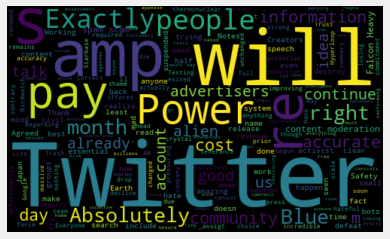

In [ ]:
# plot Word Cloud
allWords=' '.join( [twts for twts in df['Tweets']] )
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()


In [ ]:
#create function to compute the negative, neutral, and posative analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score== 0:
    return 'Neutral'
  else: 
   return 'Positive'

df['Analysis']=df['Polarity'].apply(getAnalysis)

#show dataframe
df





,Tweets,Subjectivity,Polarity,Analysis
0,,0.000,0.00,Neutral
1,_avoigt Correct,0.000,0.00,Neutral
2,,0.000,0.00,Neutral
3,Birdwatch (soon to be renamed Community Note...,0.950,0.45,Positive
4,"Trash me all day, but it’ll cost $8",0.000,0.00,Neutral
...,...,...,...,...
95,Sonic BOOMS!!,0.000,0.00,Neutral
96,Falcon Heavy launch in ~30 mins,0.500,-0.20,Negative
97,,0.000,0.00,Neutral
98,I will explain the rationale in longer form b...,1.000,0.00,Neutral


In [ ]:
#print all posative tweets ranked by positivity
j=1
sortedDF = df.sort_values(by='Polarity')
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i]=='Positive'):
    print(str(j) + ')' + sortedDF['Tweets'][i])
    print()
    j+=1

1)  Birdwatch (soon to be renamed Community Notes) has incredible potential for improving information accuracy on Twitter!

2) I try my best

3) Thank you. 

A thermonuclear name &amp; shame is exactly what will happen if this continues.

4)Regarding Twitter’s reduction in force, unfortunately there is no choice when the company is losing over $4M/day.

Everyone exited was offered 3 months of severance, which is 50% more than legally required.

5)    Twitter will not censor accurate information about anything

6)Again, to be crystal clear, Twitter’s strong commitment to content moderation remains absolutely unchanged.

In fact, we have actually seen hateful speech at times this week decline *below* our prior norms, contrary to what you may read in the press.

7)Excellent summary of Twitter’s Trust &amp; Safety from the head of the team 

8) You’re right

9) Absolutely

10) That assessment is more accurate than most people realize

11) Unsure if confirming or denying that 
I’m an alien 

In [ ]:
#print all negative tweets ranked by negativity
j=1
sortedDF = df.sort_values(by='Polarity', ascending = 'False')
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i]=='Negative'):
    print(str(j) + ')' + sortedDF['Tweets'][i])
    print()
    j+=1

1)Twitter has had a massive drop in revenue, due to activist groups pressuring advertisers, even though nothing has changed with content moderation and we did everything we could to appease the activists.

Extremely messed up! They’re trying to destroy free speech in America.

2) I’m an alien trying to get back to my home planet

3) Pretty much, or at least one of the hive minds

4): The entitled elite is not mad that they have to pay $8/month. They’re mad that anyone can pay $8/month.

5) Quite a few companies like this

6) Talked to civil society leaders , , , , , ,  Ken Hersch &amp;  about how Twitter will continue to combat hate &amp; harassment &amp; enforce its election integrity policies

7)    Falcon Heavy is a testament to the awesomeness of humanity

8)There will be a secondary tag below the name for someone who is a public figure, which is already the case for politicians

9) Yes, this will destroy the bots. If a paid Blue account engages in spam/scam, that account will be s

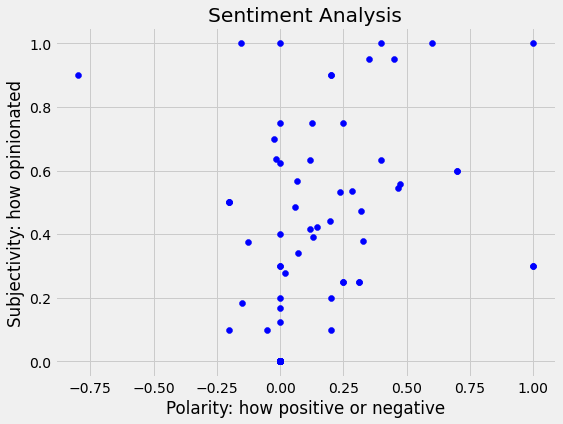

In [ ]:
#Plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color = 'Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity: how positive or negative')
plt.ylabel('Subjectivity: how opinionated')
plt.show()


In [ ]:
#get the percentage of positive tweets
ptweets = df[df.Analysis=='Positive']
ptweets= ptweets['Tweets']
round((ptweets.shape[0]/df.shape[0])*100, 1)

35.0

In [ ]:
#get the percentage of negative tweets
ntweets = df[df.Analysis=='Negative']
ntweets= ntweets['Tweets']
round((ntweets.shape[0]/df.shape[0])*100, 1)

11.0

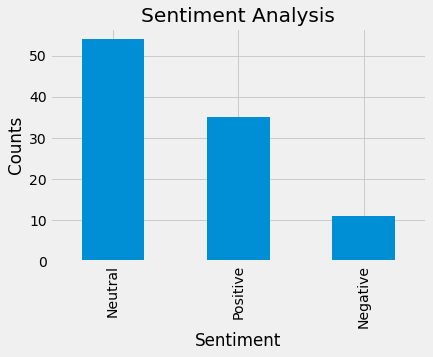

In [ ]:
#show the value counts

df['Analysis'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()